** **
**Projeto Disciplina Introdução à Ciência de Dados (SME0828) - 2021**

**Docente: Franscisco Aparecido Rodrigues**

**Lucas Roberto de Oliveira Lopes** \\

**N°USP: 10850460**

**ICMC/USP - São Carlos, SP**

** **

#**1 PROBLEMA**


**Expectativa de Vida Mundial**

Embora tenha havido muitos estudos realizados no passado sobre fatores que afetam a expectativa de vida, considerando variáveis ​​demográficas, composição de renda e taxas de mortalidade. Verificou-se que o efeito da imunização e do índice de desenvolvimento humano não foi levado em consideração no passado. Além disso, algumas das pesquisas anteriores foram feitas considerando a regressão linear múltipla com base no conjunto de dados de um ano para todos os países. Portanto, isso dá motivação para resolver ambos os fatores declarados anteriormente, formulando um modelo de aprendizado de máquina considerando os dados de um período de 2000 a 2015 para todos os países. Imunizações importantes como hepatite B, poliomielite e difteria também serão consideradas. Em suma, este estudo se concentrará em fatores de imunização, fatores de mortalidade, fatores econômicos, fatores sociais e outros fatores relacionados à saúde também. Como as observações desse conjunto de dados são baseadas em diferentes países, será mais fácil para um país determinar o fator de previsão que está contribuindo para diminuir o valor da expectativa de vida. Isso ajudará a sugerir a um país qual área deve receber importância para melhorar de forma eficiente a expectativa de vida de sua população.

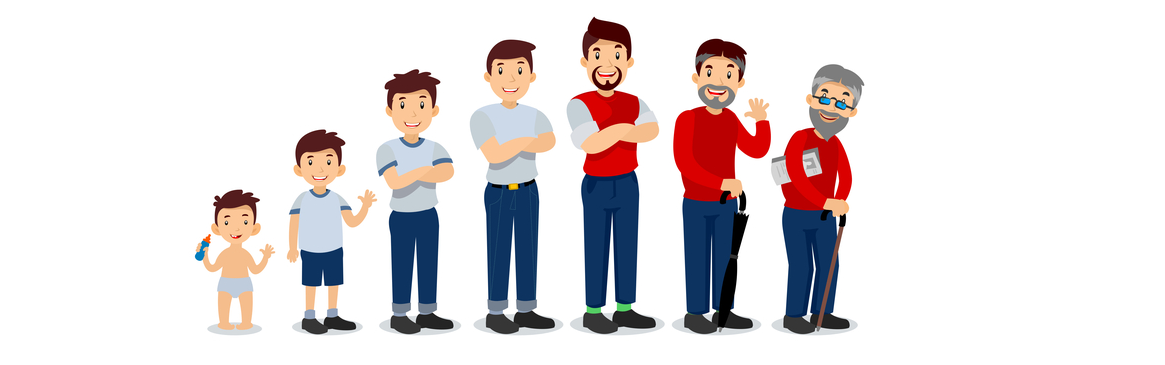


#**2 DADOS**


Este conjunto de dados contém informações compiladas pela Organização Mundial da Saúde e pelas Nações Unidas para rastrear fatores que afetam a expectativa de vida. Os dados contêm 2.938 linhas e 22 colunas. As colunas incluem: país, ano, estado de desenvolvimento, mortalidade adulta, expectativa de vida, mortes infantis, consumo de álcool per capita, gastos do país com saúde, cobertura de imunização, IMC, mortes menores de 5 anos, mortes devido ao HIV / AIDS, PIB, população, condição corporal (BMI), informações de renda e educação.




Dataset pode ser encontrado em: [Dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who)

In [ ]:
#Importando as bibliotecas que vamos utilizar
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Leitura dos dados
dados = pd.read_csv('/content/Life Expectancy Data.csv')

In [ ]:
#Mudando os nomes das colunas para facilitar as análises
colunas = ['País','Ano','Status','Expectativa de Vida','Mortalidade Adulta','Morte Infantil',
           'Alcool','Porcentagem de Despesas','Hepatite B','Sarampo','BMI','Morte antes 5',
           'Polio','Despesa Total','Diftéria','HIV/AIDS','GDP','População','Magreza 10 - 19 anos',
           'Magreza 5 - 9 Anos','Composição de recursos de receita','Escolaridade']
dados.columns = colunas

In [ ]:
dados.head()

,País,Ano,Status,Expectativa de Vida,Mortalidade Adulta,Morte Infantil,Alcool,Porcentagem de Despesas,Hepatite B,Sarampo,BMI,Morte antes 5,Polio,Despesa Total,Diftéria,HIV/AIDS,GDP,População,Magreza 10 - 19 anos,Magreza 5 - 9 Anos,Composição de recursos de receita,Escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#**3 ANÁLISE DE DIMENSÃO**

In [ ]:
print(f'Esse dataset possui {dados.shape[0]} Linhas e {dados.shape[1] } Colunas')

Esse dataset possui 2938 Linhas e 22 Colunas


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   País                               2938 non-null   object 
 1   Ano                                2938 non-null   int64  
 2   Status                             2938 non-null   object 
 3   Expectativa de Vida                2928 non-null   float64
 4   Mortalidade Adulta                 2928 non-null   float64
 5   Morte Infantil                     2938 non-null   int64  
 6   Alcool                             2744 non-null   float64
 7   Porcentagem de Despesas            2938 non-null   float64
 8   Hepatite B                         2385 non-null   float64
 9   Sarampo                            2938 non-null   int64  
 10  BMI                                2904 non-null   float64
 11  Morte antes 5                      2938 non-null   int64

#**4 TRATAMENTO DOS DADOS**

Verificar dados Duplicados

In [ ]:
dados.duplicated().sum()

0

Verificar quantidade de dados faltantes

In [ ]:
dados.isnull().sum()

País                                   0
Ano                                    0
Status                                 0
Expectativa de Vida                   10
Mortalidade Adulta                    10
Morte Infantil                         0
Alcool                               194
Porcentagem de Despesas                0
Hepatite B                           553
Sarampo                                0
BMI                                   34
Morte antes 5                          0
Polio                                 19
Despesa Total                        226
Diftéria                              19
HIV/AIDS                               0
GDP                                  448
População                            652
Magreza 10 - 19 anos                  34
Magreza 5 - 9 Anos                    34
Composição de recursos de receita    167
Escolaridade                         163
dtype: int64

Vamos substituir valores nulos pela média 

In [ ]:
dados.fillna(dados.mean(),inplace = True)

#**5 ANALISE DESCRITIVA**

Analise de Correlação entre as váriaveis 

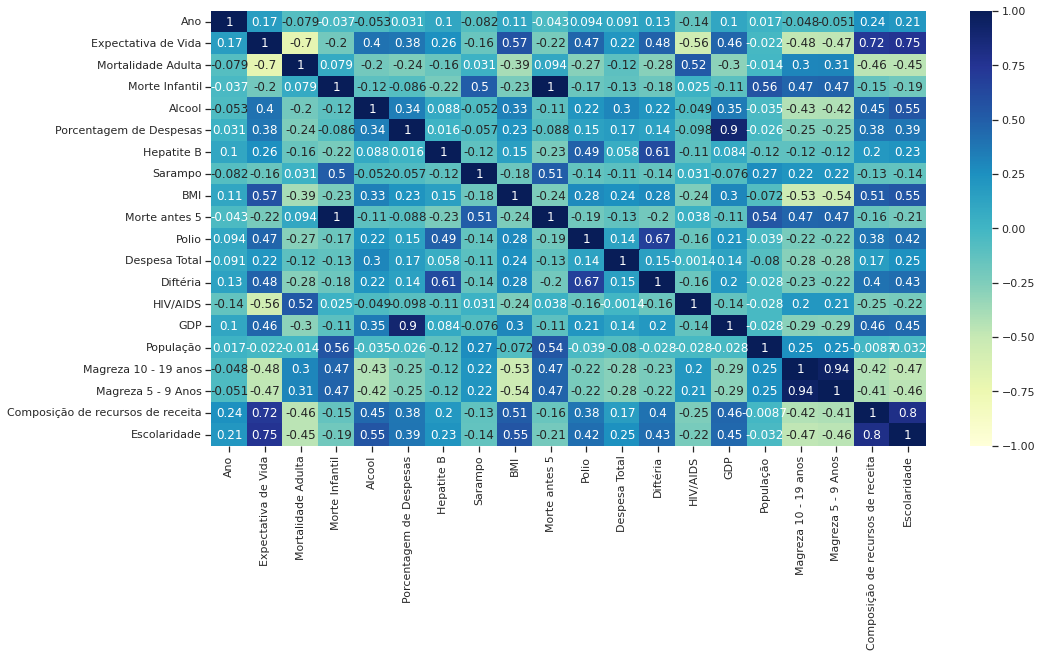

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(dados.corr(),cmap="YlGnBu",vmin=-1, vmax=1,center= 0,annot = True)
plt.show()

Verificando algumas correlações graficamente

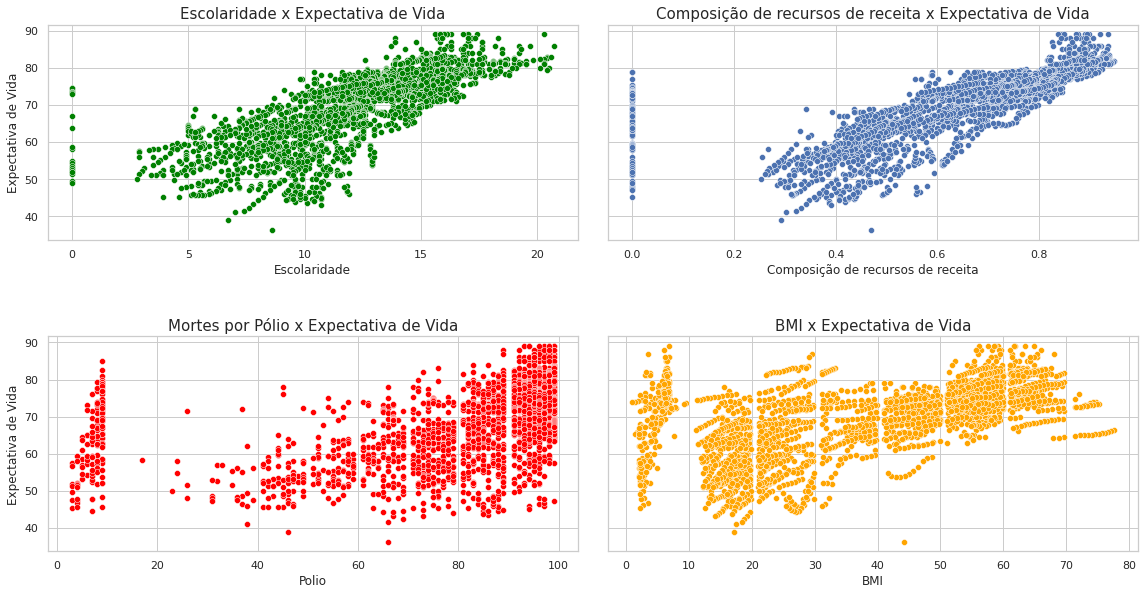

In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2,figsize=(16,8),sharey = True)
plt.tight_layout()
plt.subplots_adjust(hspace=0.45)

sns.scatterplot(ax = axes[0,0], x = dados['Escolaridade'],y = dados['Expectativa de Vida'],color = 'green')
axes[0,0].set_title("Escolaridade x Expectativa de Vida",size = 15)

sns.scatterplot(ax = axes[0,1], x = dados['Composição de recursos de receita'],y = dados['Expectativa de Vida'])
axes[0,1].set_title("Composição de recursos de receita x Expectativa de Vida",size = 15)

sns.scatterplot(ax = axes[1,1], x = dados['BMI'],y = dados['Expectativa de Vida'],color = 'orange')
axes[1,1].set_title("BMI x Expectativa de Vida",size = 15)

sns.scatterplot(ax = axes[1,0], x = dados['Polio'],y = dados['Expectativa de Vida'],color = 'red')
axes[1,0].set_title("Mortes por Pólio x Expectativa de Vida",size = 15)

plt.show()

Podemos notar com esses gráficos que as primeiras observações não aparentam possuir um padrão linear e isso pode dificultar na implementação de um bom modelo de Regressão Lineaer Múltipla

Boxplot dos dados

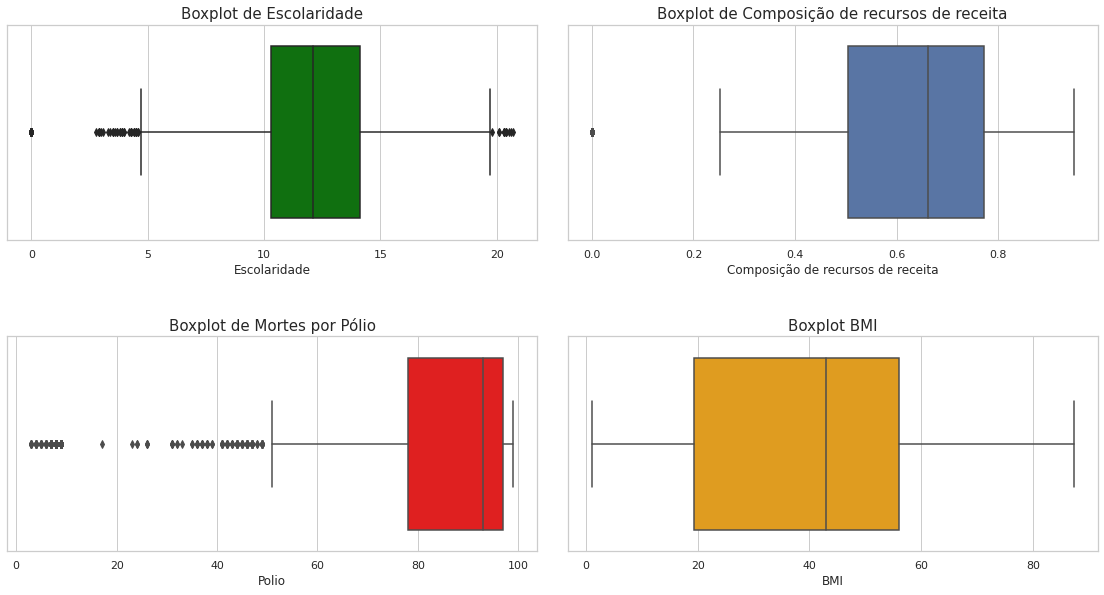

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(16,8),sharey = True)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.45)

sns.boxplot(ax = axes[0,0],x =  dados['Escolaridade'],color = 'green')
axes[0,0].set_title("Boxplot de Escolaridade",size = 15)

sns.boxplot(ax = axes[0,1], x = dados['Composição de recursos de receita'])
axes[0,1].set_title("Boxplot de Composição de recursos de receita",size = 15)

sns.boxplot(ax = axes[1,1], x = dados['BMI'],color = 'orange')
axes[1,1].set_title("Boxplot BMI",size = 15)

sns.boxplot(ax = axes[1,0], x = dados['Polio'],color = 'red')
axes[1,0].set_title("Boxplot de Mortes por Pólio",size = 15)

plt.show()

Podemos notar com essas análises descritivas que as features possuem muitos outliers

#**6 SELEÇÃO DE FEATURES**

In [ ]:
#Separando as variaveis preditoras e resposta
X = dados.drop(['Expectativa de Vida','País','Status'],axis = 1)
y = dados['Expectativa de Vida']

In [ ]:
#Organizando as variaveis qualitativas
status_dummy = pd.get_dummies(dados['Status'])
X = pd.concat([X,status_dummy],axis = 1)
X.head()

,Ano,Mortalidade Adulta,Morte Infantil,Alcool,Porcentagem de Despesas,Hepatite B,Sarampo,BMI,Morte antes 5,Polio,Despesa Total,Diftéria,HIV/AIDS,GDP,População,Magreza 10 - 19 anos,Magreza 5 - 9 Anos,Composição de recursos de receita,Escolaridade,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


#**7 MACHINE LEARNING**

Para esses dados utilizaremos inicialmente o modelo de Regressão Linear Múltipla 

Modelo:
\begin{align}
 Y = \beta_0 + \beta_1 X_1 + ... + \beta_k X_k 
\end{align}

Vamos separar 80% dos dados para implementar e verificar o melhor modelo e os 20% restantes vai ser para conferir os resultados do modelo final.

In [ ]:
#Separando em Teste e Treino
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
#Implementando o Modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
regressao = LinearRegression().fit(X_train,y_train)

predicao = regressao.predict(X_train)

Vamos verificar a acuracia do modelo nos dados de Treino

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(f'Métricas nos dados de Treino:')
print(f'R²: {regressao.score(X_train,y_train)}')
print(f'EQM: {mean_squared_error(y_train,predicao)}')
print(f'EAM: {mean_absolute_error(y_train,predicao)}')

Métricas nos dados de Treino:
R²: 0.8182235759567668
EQM: 16.59327983538568
EAM: 3.04339763027913


Vamos Utilizar o método Cross Validation para verificar melhor a acurácia do modelo

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(regressao,X_train,y_train,cv = 5)
print(f'Resultados : {score}')
print(f'Média dos Resultados : {np.mean(score)}')

Resultados : [0.81941228 0.8373339  0.78797608 0.79691437 0.81780819]
Média dos Resultados : 0.8118889647838342


Vamos verificar a adequabilidade do modelo utilizando a biblioteca statsmodel

https://www.statsmodels.org/stable/regression.html

In [ ]:
import statsmodels.api as sm
from scipy import stats

X_train2 = sm.add_constant(X_train)
regr = sm.OLS(y_train,X_train2).fit()
print(regr.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             OLS Regression Results                            
Dep. Variable:     Expectativa de Vida   R-squared:                       0.818
Model:                             OLS   Adj. R-squared:                  0.817
Method:                  Least Squares   F-statistic:                     524.2
Date:                 Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                         08:46:21   Log-Likelihood:                -6635.1
No. Observations:                 2350   AIC:                         1.331e+04
Df Residuals:                     2329   BIC:                         1.343e+04
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Análise dos Resíduos

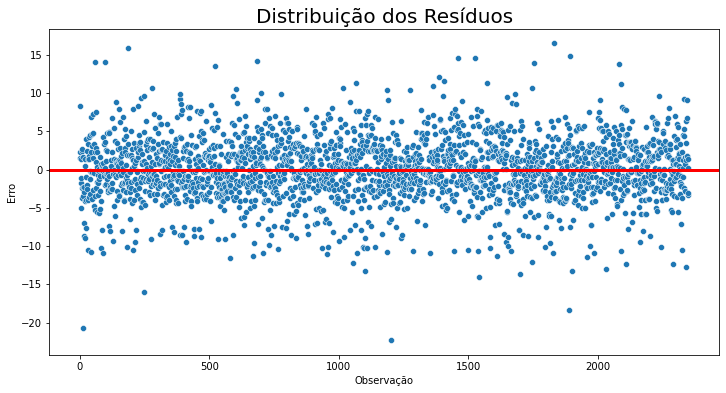

In [ ]:
plt.figure(figsize = (12,6))
plt.title('Distribuição dos Resíduos',size = 20)
plt.ylabel('Erro')
plt.xlabel("Observação")
plt.axhline(y=0, color = 'red',linewidth=3)
sns.scatterplot(x = range(len(regr.resid)),y = regr.resid)


Os residuos parecem estar bem distribuidos ao longo da reta, o que verifica a linearidade dos dados, entretanto é possivel notar que algumas observações ficaram muito longe da reta o que indica possiveis outliers.

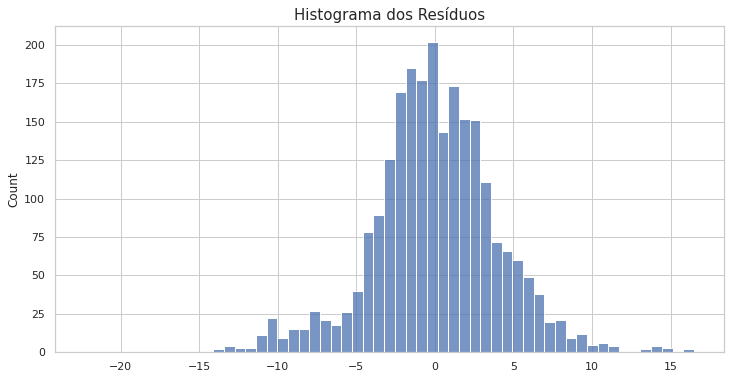

In [ ]:
#Distribuição do Residuo
plt.figure(figsize = (12,6))
plt.title('Histograma dos Resíduos',size = 15)
sns.histplot(regr.resid)

Os resíduos aparentam ter uma distribuição normal, porém para confirmar seria necessário um teste de normalidade.

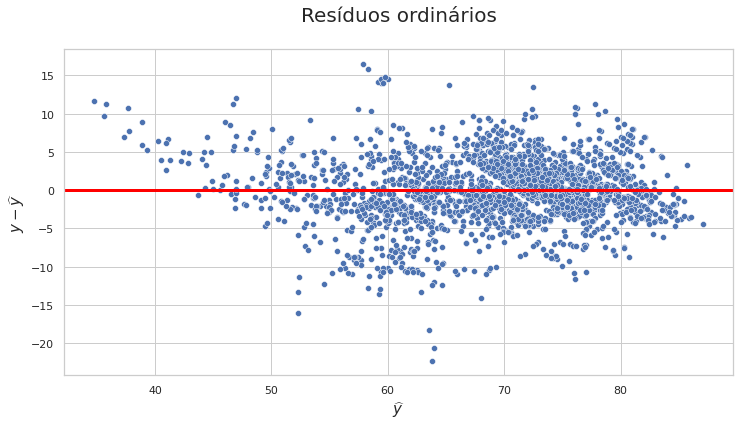

In [ ]:
plt.figure(figsize = (12,6))
plt.title('Resíduos ordinários\n',size = 20)
plt.ylabel('$y - \widehat{y}$',size = 15)
plt.xlabel("$\widehat{y}$",size = 15)
plt.axhline(y=0, color = 'red',linewidth=3)
sns.scatterplot(x = regr.predict(X_train2),y = regr.resid)

Após verificar algumas hipóteses do nosso modelo, vamos finalmente observar sua acurácia nos dados de Teste.

In [ ]:
predicao_teste = regressao.predict(X_test)
print(f'Métricas nos dados de Teste:')
print(f'R²: {regressao.score(X_test,y_test)}')
print(f'EQM: {mean_squared_error(y_test,predicao_teste)}')
print(f'EAM: {mean_absolute_error(y_test,predicao_teste)}')

Métricas nos dados de Teste:
R²: 0.8240562394240223
EQM: 15.242936417631352
EAM: 2.8583331337679474


Tivemos uma acurácia boa para os dados de Teste e muito próxima da que obtivemos nos dados de Treino.


Vamos verificar graficamente os valores reais versus a sua predição nos dados de Teste

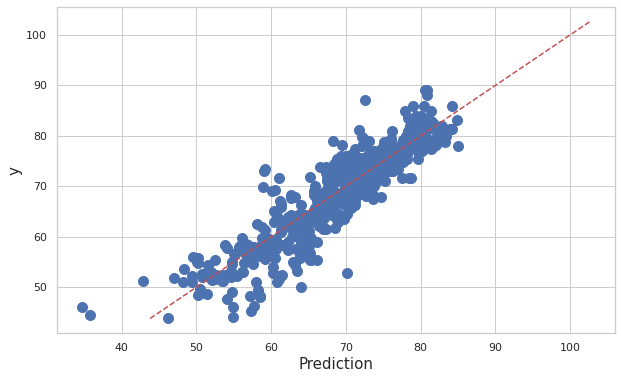

In [ ]:
plt.figure(figsize=(10,6))
l = plt.plot(regressao.predict(X_test), y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

Nosso modelo de Regressão Linear Múltipla parece estar adequado e fazendo boas previsões, porém vamos testar outros modelos para verificar se obtemos um resultado ainda melhor.

Modelos que vamos testar :


*   Extra Tree Regressor
*   Random Forest Regressor


##Extra Tree Regressor

Esse modelo é mais complexo que o de Regressão Linear Múltipla, ele implementa um estimador que ajusta várias árvores de decisão aleatórias (também conhecidas como Extra Trees) em várias sub amostras do conjunto de dados e usa a média para melhorar a acurácia e controlar o overfitting do modelo.

In [ ]:
#Criando o modelo
#Vamos implementar o modelo apenas com os hiperparâmetros padrões do sklearn
from sklearn.ensemble import ExtraTreesRegressor
extra = ExtraTreesRegressor(n_estimators = 100,).fit(X_train, y_train)

Vamos verificar a acurácia nos dados de Treino utilizando Cross Validation

In [ ]:
#Cross Validation
score = cross_val_score(extra,X_train,y_train,cv = 5)
print(f'Resultados : {score}')
print(f'Média dos Resultados : {np.mean(score)}')

Resultados : [0.96926779 0.97241099 0.96425244 0.96510623 0.95763381]
Média dos Resultados : 0.9657342524360883


Acurácia nos dados de Teste

In [ ]:
extra_teste = extra.predict(X_test)
print(f'Métricas nos dados de Teste:')
print(f'R²: {extra.score(X_test,y_test)}')
print(f'EQM: {mean_squared_error(y_test,extra_teste)}')
print(f'EAM: {mean_absolute_error(y_test,extra_teste)}')

Métricas nos dados de Teste:
R²: 0.9764677267026275
EQM: 2.0387250133787824
EAM: 0.8621199002825167


Vamos plotar as previsões que nosso modelo está fazendo e comparar com os valores reais

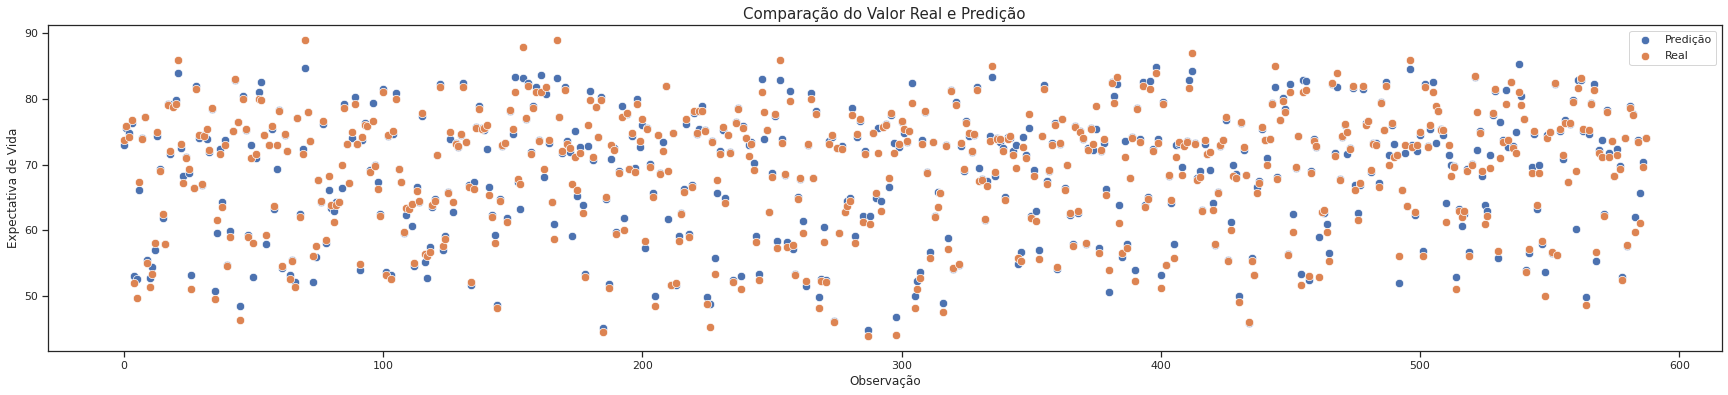

In [ ]:
sns.set_style("ticks")
plt.figure(figsize=(30,6))
sns.scatterplot(x = range(len(y_test)),y = extra.predict(X_test),s = 70, label = 'Predição')
sns.scatterplot(x = range(len(y_test)),y = y_test,s = 70,label = 'Real')
plt.title("Comparação do Valor Real e Predição",size  = 15)
plt.xlabel("Observação")
plt.legend()
plt.show()

Como esperado esse modelo está com uma acurácia muito mais alta e fazendo previsões muito mais próximas dos valores reais do que o modelo de Regressão Linear Múltipla.

##Random Forrest Regressor

Este modelo é parecido com o Extra Tree Regressor, é um metaestimador que ajusta várias árvores de decisão de classificação em várias sub amostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o controle de overfitting. O tamanho da subamostra é controlado com o parâmetro max_samples se bootstrap = True (padrão), caso contrário, todo o conjunto de dados é usado para construir cada árvore.

In [ ]:
#Implementando o Modelo Random Forrest Regressor
#Implementando com os hiperparâmetros padrões do sklearn
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor().fit(X_train,y_train)

Acurácia nos dados de Treino utilizando Cross Validation

In [ ]:
score = cross_val_score(random,X_train,y_train,cv = 5)
print(f'Resultados : {score}')
print(f'Média dos Resultados : {np.mean(score)}')

Resultados : [0.96088408 0.96533061 0.95734907 0.95377959 0.94234474]
Média dos Resultados : 0.9559376174935605


Acurácia nos dados de Teste 

In [ ]:
random_teste = random.predict(X_test)
print(f'Métricas nos dados de Teste:')
print(f'R²: {random.score(X_test,y_test)}')
print(f'EQM: {mean_squared_error(y_test,random_teste)}')
print(f'EAM: {mean_absolute_error(y_test,random_teste)}')

Métricas nos dados de Teste:
R²: 0.9668969648911481
EQM: 2.867890613131188
EAM: 1.085716843704695


Obtemos uma acurácia muito boa nos dados de Teste, um pouco abaixo do modelo Extra Tree Regressor.

#**8 Feature Importance**

Agora com nossos modelos já implementados e devidamente testados, vamos verificar quais features possuem mais importancia para o modelo.

Vamos utilizar uma função já implementada no sklearn para isso.

Importância de cada Feature para o Modelo Extra Tree Regressor

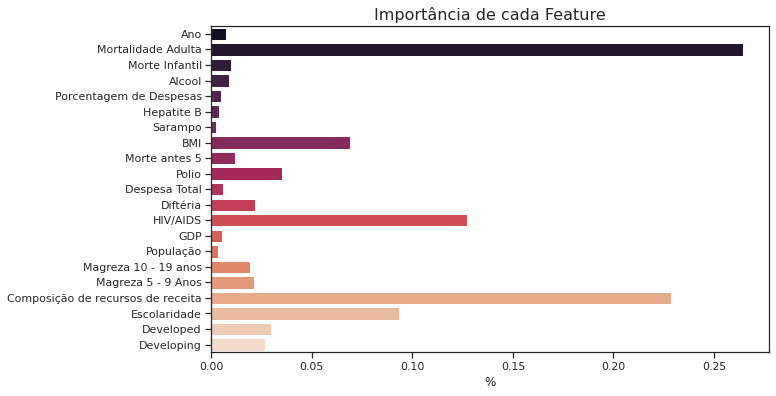

In [ ]:
importances = pd.Series(data = extra.feature_importances_ , index = extra.feature_names_in_)
plt.figure(figsize=(10,6))
sns.color_palette("rocket", as_cmap=True)
sns.barplot(x = importances, y = importances.index, orient = 'h',palette = "rocket").set_title("Importância de cada Feature",size = 16)
plt.xlabel("%")
plt.show()

Podemos ver que "mortalidade Adulta", "composição dos recursos de receita" e "HID/AIDS" possuem uma grande importância para o nosso modelo.

#**9 RESULTADOS**

Podemos notar que o modelo com a melhor performance foi o Extra Tree Regressor que obteve uma acurácia um pouco melhor que o Random Forrest Regressor tanto na validação cruzada quanto nos dados de teste. Entretanto, vale ressaltar que cada modelo que implementamos tem a sua utilidade, o nosso modelo inicial de Regressão Linear não obteve uma acurácia tão boa quanto os outros dois modelos, porém como ele é um modelo mais simples se torna mais facil de ser implementado e compreendido por outras pessoas que não são da área de ciência de dados. Contudo como o objetivo inicial desse projeto foi encontrar a expectativa de vida de um país baseado em váriaveis demograficas o modelo mais adequado seria o Extra Tree Regressor pela sua eficaz capacidade de fazer previsões muito próximas do valor esperado.

Além disso, o modelo selecionou algumas das features mais importantes para entender a Expectativa de Vida em cada país e as principais foram "Mortalidade Adulta", "Composição de Recursos de receita" e "HIV / AIDS". Essas seleções se mostram coerente com a realidade, visto que um País que possui pouca Composição de recursos de receita as pessoas daquela região tendem a ter uma falta de infraestrutura de lazer/saúde, o que corrobora para uma qualidade de vida muito inferior e possivelmente uma expectativa de vida menor do que os países que possuem isso. A mortalidade Adulta também é uma boa explicação, dado que um país onde as pessoas possuem grande chance de morrer ao entrar na vida adulta, a expectativa de vida desse local tende a diminuir bastante.